# Tutorial: Making custom matplotlib markers

Add a little personal touch or more options for clarity to your scatter plots with your own custom markers! In this short tutorial I'll explain step by step how you can create and use virtually any shape you can think of as a marker.

Things you may need:

svgpath2mpl package (see method 2)

svgpathtools package (optional, see step 4a)

Text editor (optional, see step 4a)

Imaging Processing Software (optional, see step 4a)

## Method One: Drawing your own simple shapes

There are already a variety of simple marker shapes to choose from in matplotlib:

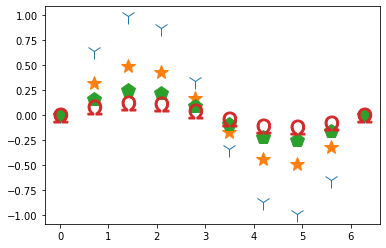

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,10)
y = np.sin(x)

A = 1.
for m in ['1','*','p','$\Omega$']:
    plt.plot(x,A*y, 'o', marker=m, markersize=15)
    A*=0.5

However, if these don't quite cut it, you can draw your own shapes by creating matplotlib $\texttt{Path}$ objects. Path objects consist of two lists: one of the shape's vertices, and other with descriptions on how to draw the lines between those vertices, called codes. Here's a simple square:

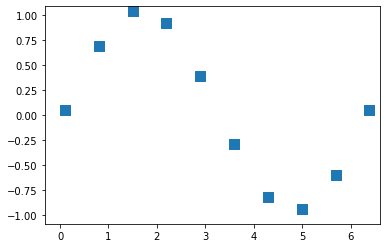

In [9]:
from matplotlib.path import Path

verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # back to left, bottom
]

codes = [
    Path.MOVETO, #begin drawing
    Path.LINETO, #straight line
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY, #close shape
]

path = Path(verts, codes)

plt.plot(x,y,'o',marker=path,markersize=20)

But we can get a little more creative. Let's make something else, but still relatively simple:

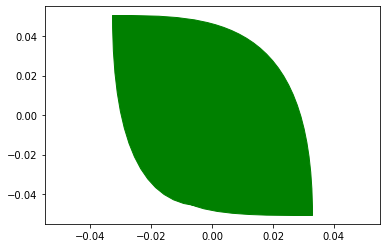

In [10]:
verts = [
    (0,-0.9),
    (-1,-1),
    (-1,1),
    (0,1),
    (1,1),
    (1,-1),
    (0,-1),
    (-1,-1)
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE4,
    Path.CURVE3
]

path = Path(verts,codes)

plt.plot(0,0,'go',marker=path,markersize=200)

It's a leaf! You may have noticed I used two different path codes here. CURVE3 draws a quadratic Bezier curve from that point, uses the next vertex as a "control point" and ends at the point after that (3 points total). CURVE4 behaves similarly except with 2 control points instead of 1 (4 points total). Looking at my creation up close, I'm satisfied and can plot my leaves blowing sinusoidally in the wind:

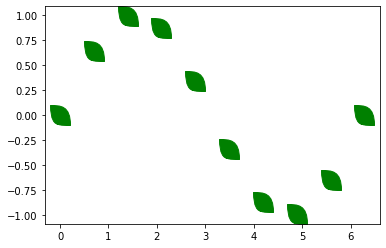

In [11]:
plt.plot(x,y,'go',marker=path,markersize=20)

## Method 2: Using SVG Images

If you want something a little more complex, you can directly plot images in SVG ("Scalar Vector Graphics") format.

### Step 1: Your image
To begin, you will need to decide on the image or shape you would like to convert into a marker. The only requirement is that you must have your image as a SVG file. It is possible to convert PDFs to SVGs, save digital drawings as SVGs, or find SVG clipart online. (Note: when taking images from the internet, always be aware of the copyright and how you will use them. Using copyrighted images once in a limited capacity for "scholarly" purposes (e.g., in your lectures, at a conference, etc.) falls under "fair use" and is fine, but using them in a way in which access is unlimited or you make money is not. If you're worried about legal ambiguity, it's best to stick to images in the public domain or under a creative commons license.)

Create a new directory and save your image there.

### Step 2: install svgpath2mpl and svgpathtools

Next, you need the svgpath2mpl and svgpathtools packagea. You can simply use pip install on the command line or in your notebook.

The svgpathtools package allows to read in SVG paths into python, and svgpath2mpl will allow us to parse the SVG path of our image to a matplotlib $\texttt{Path}$ object. 

Note: svgpathtools is not necessary if you prefer to manually copy and past the "d" string of the SVG path. This may or may not be necessary depending on your image. See Step 4a for more detail.

In [ ]:
!pip install svgpath2mpl
!pip install svgpathtools

### Step 3: Read in the Path

Create a new Jupyter Notebook or script in the same directory as your image. Import key functions from our new packages and matplotlib, and read in the path:

In [12]:
import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

planet_path, attributes = svg2paths('saturn.svg')

What we care about are the vertices and path codes, like our simple drawings above. These are stored in the "d" string in the attributes variable. Pass this through the parse_paths function, which will return a matplotlib path object:

In [13]:
planet_marker = parse_path(attributes[0]['d'])

### Step 4: Minor touchups

You're almost ready to use your new marker! Before you do, you need to do just a few minor adjustments to our path object. First, out of the box, matplotlib will want to plot your marker such that the lower left corner is at the center of your data point, so let's just shift the vertices slightly.

In [14]:
planet_marker.vertices -= planet_marker.vertices.mean(axis=0)

Next, the image will be upside down and flipped, so let's take care of that as well:

In [15]:
planet_marker = planet_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
planet_marker = planet_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

And there you go! Ready to plot!

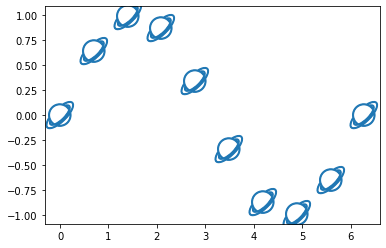

In [17]:
plt.plot(x,y,'o',marker=planet_marker,markersize=30)

### Step 4a: Troubleshooting

If you plot your new marker and parts of the image are missing, this may be because there are multiple elements not captured by the first "d" string. In this case, you may have to import the SVG path manually:

Open the SVG file in the image processing software of your choice. Be sure to select "Import Paths" if you are given the option when opening the file. I use the unfortunately named GIMP software, which is free for Windows. Next, we want to export the SVG path. In GIMP, this is done by right clicking on "Imported Path" in the Paths window and selecting Export Path. If you can't find this, you can also select the image, then click Select > To Path. Go to the Paths window, right click on Selection and click Export Path. Save the path as a text file in your directory.

In photoshop, I believe this is done by selecting the appropriate layer, then right clicking on the selection and selecting Export > Export As. Choose SVG format and export to a text file.

Open the text file and look for a long string after a d = "....". Copy the string and paste it into your notebook or script and pass it through parse_path. Do the same steps as above after this and all elements of your image should be there.

Note: By using this method, you will not need the svgpathtools package.

In [ ]:
planet_marker = parse_path("""M 61.03,41.69
           C 61.03,46.32 57.28,50.07 52.67,50.07
             48.06,50.07 44.31,46.32 44.31,41.69
             44.31,37.07 48.06,33.32 52.67,33.32
             52.67,33.32 57.28,33.32 61.03,41.69 Z
           M 83.17,25.94
           C 83.77,28.28 83.69,30.89 83.51,33.54
             92.28,39.16 93.78,42.55 93.72,43.10
             93.71,43.12 92.04,45.11 82.44,44.41
             81.20,44.32 79.91,44.18 78.56,44.01
             79.65,40.70 80.25,37.17 80.25,33.50
             80.25,15.03 65.26,0.00 46.83,0.00
             32.71,0.00 20.61,8.83 15.72,21.26
             7.66,15.96 6.23,12.76 6.29,12.22
             6.31,12.20 7.71,10.07 17.30,10.77
             18.59,8.40 20.64,6.48 22.77,4.97
             21.42,4.81 19.46,4.73 18.04,4.62
             7.71,3.87 1.94,5.66 0.37,10.10
             -1.30,14.84 2.66,20.26 12.46,26.66
             12.93,26.97 13.44,27.28 13.94,27.59
             13.59,29.51 13.40,31.48 13.40,33.50
             13.40,51.97 28.40,67.00 46.83,67.00
             59.27,67.00 70.14,60.14 75.90,50.01
             78.03,50.32 80.07,50.55 81.98,50.69
             92.30,51.45 98.08,49.66 99.64,45.22
             101.81,39.06 93.85,32.07 83.17,25.94 Z
           M 46.83,60.52
           C 31.96,60.52 19.87,48.40 19.87,33.50
             19.87,32.69 19.92,31.89 19.99,31.10
             26.02,34.35 33.03,37.53 40.58,40.39
             40.78,38.20 41.55,36.18 42.74,34.47
             34.80,31.46 27.47,28.09 21.36,24.66
             25.02,14.09 35.05,6.48 46.83,6.48
             61.69,6.48 73.78,18.60 73.78,33.50
             73.78,36.83 73.18,40.02 72.07,42.97
             69.86,42.55 67.56,42.05 65.20,41.48
             65.20,41.50 65.20,41.51 65.20,41.54
             65.20,43.73 64.62,45.79 63.61,47.58
             65.46,48.03 67.27,48.43 69.03,48.79
             64.17,55.87 56.03,60.52 46.83,60.52 Z""")

All in all, your total code will look like this:

In [ ]:
import matplotlib as mpl
from svgpath2mpl import parse_path
from svgpathtools import svg2paths

planet_path, attributes = svg2paths('saturn.svg')
planet_marker = parse_path(attributes[0]['d'])
planet_marker.vertices -= planet_marker.vertices.mean(axis=0)
planet_marker = planet_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
planet_marker = planet_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

If you save this as a script you can import it into your future projects for fun plotting all the time! You can even keep adding as many different markers as you want in just a few short lines of code each.

And that's it!! Show me your markers or reach out if you have trouble on Twitter @ExoplanetPete. Happy plotting!